# Executive Summary

<a id='Executive_Summary'></a>

The following presentation will prove conclusively that consumption of beer results in an increase in terms of attractiveness to mosquitos. This presentation will begin by loading a dataset containing data related to mosquito attractiveness for individuals that consumed beer and water. This data will then be compared for individuals that consumed beer versus water. The two distributions will then be proven to be different in terms of statistical significance beyond random chance. The primary method for doing so will be the computational method. T-Tests will also be used to verify this conclusion.  


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
import random

from scipy import stats
from scipy.stats.mstats import gmean
from statsmodels.stats.descriptivestats import Description

%matplotlib inline
sns.set()

class Mosquitos:
    
    file_data = ''
    
    beer_df = pd.DataFrame()
    water_df = pd.DataFrame()
    
    beer_response = np.array([])
    water_response = np.array([])
    
    def load_file(self, file_name):
        
        self.file_data = pd.read_csv(file_name)
        self.beer_df = self.file_data[(self.file_data['Treatment'] == 'Beer')].copy()
        self.beer_response = self.beer_df['Response'].to_numpy()
        self.beer_response = np.sort(self.beer_response)
        self.water_df = self.file_data[(self.file_data['Treatment'] == 'Water')].copy()
        self.water_response = self.water_df['Response'].to_numpy()
        self.water_response = np.sort(self.water_response)
        self.file_data.info()
            
    def __init__(self, file_name):        
        
        self.load_file(file_name)
        
_mosquitos = Mosquitos('../input/mosquitos/mosquitos_data.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Response   43 non-null     int64 
 1   Treatment  43 non-null     object
dtypes: int64(1), object(1)
memory usage: 816.0+ bytes


In [2]:
_mosquitos.file_data.isnull().sum()

Response     0
Treatment    0
dtype: int64

In [3]:
_mosquitos.beer_response

array([17, 18, 19, 19, 20, 20, 20, 20, 21, 21, 21, 23, 24, 24, 24, 25, 26,
       27, 27, 27, 28, 28, 29, 31, 31])

In [4]:
_mosquitos.water_response

array([12, 13, 15, 15, 16, 18, 19, 19, 20, 20, 21, 21, 22, 22, 22, 23, 24,
       24])

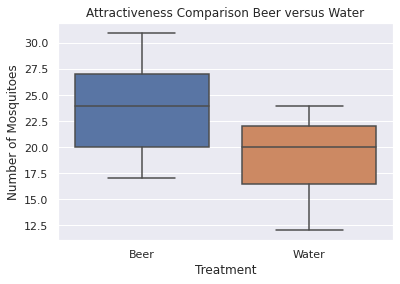

In [5]:
sns.boxplot(data = _mosquitos.file_data, y = 'Response', x = 'Treatment').set(title = 'Attractiveness Comparison Beer versus Water', ylabel = 'Number of Mosquitoes')
plt.show()

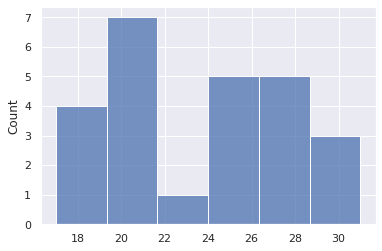

In [6]:
sns.histplot(_mosquitos.beer_response)
plt.show()

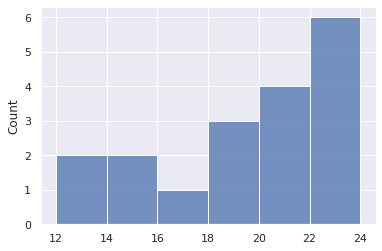

In [7]:
sns.histplot(_mosquitos.water_response)
plt.show()

In [8]:
_mosquitos.beer_df.describe()

,Response
count,25.000000
mean,23.600000
std,4.133199
min,17.000000
25%,20.000000
50%,24.000000
75%,27.000000
max,31.000000


In [9]:
_mosquitos.water_df.describe()

,Response
count,18.000000
mean,19.222222
std,3.671120
min,12.000000
25%,16.500000
50%,20.000000
75%,22.000000
max,24.000000


There does appear to be an association between beer consumption and attractiveness to mosquitos. Individuals who consumed beer attracted on average over four more mosquitos than individuals that did not consume beer when considering both mean and median. The fact that mean and median are so similar would suggest that outliers are not adversely affecting the mean. Whether or not this difference is significant will be examined in greater detail below.

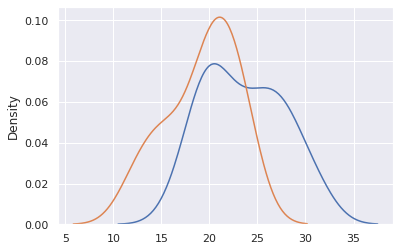

In [10]:
sns.kdeplot(_mosquitos.beer_response)
sns.kdeplot(_mosquitos.water_response)
plt.show()

In [11]:
print('Mean:', np.mean(_mosquitos.beer_response) - np.mean(_mosquitos.water_response))
print('Geometric Mean:', gmean(_mosquitos.beer_response) - gmean(_mosquitos.water_response))
print('Harmonic Mean:', st.harmonic_mean(_mosquitos.beer_response) - st.harmonic_mean(_mosquitos.water_response))
print('Minimum:', np.min(_mosquitos.beer_response) - np.min(_mosquitos.water_response))
print('Maximum:', np.max(_mosquitos.beer_response) - np.max(_mosquitos.water_response))

Mean: 4.37777777777778
Geometric Mean: 4.398713175692652
Harmonic Mean: 4.459776787460434
Minimum: 5
Maximum: 7


In [12]:
descriptive_statistics = pd.DataFrame()

statistic_description = []
statistic_description.append('Arithmetic Mean')
statistic_description.append('Harmonic Mean')
statistic_description.append('Median')
statistic_description.append('Median Low')
statistic_description.append('Median High')
statistic_description.append('Median Grouped')
statistic_description.append('Standard Deviation')
statistic_description.append('Mean Absolute Deviation')
statistic_description.append('Median Absolute Deviation')
statistic_description.append('Variance')

beer = []
beer.append(st.mean(_mosquitos.beer_response))
beer.append(st.harmonic_mean(_mosquitos.beer_response))
beer.append(st.median(_mosquitos.beer_response))
beer.append(st.median_low(_mosquitos.beer_response))
beer.append(st.median_high(_mosquitos.beer_response))
beer.append(st.median_grouped(_mosquitos.beer_response))
beer.append(st.stdev(_mosquitos.beer_response))
beer.append(float(_mosquitos.beer_df.mad()))
beer.append(stats.median_abs_deviation(_mosquitos.beer_response))
beer.append(st.variance(_mosquitos.beer_response))

water = []
water.append(st.mean(_mosquitos.water_response))
water.append(st.harmonic_mean(_mosquitos.water_response))
water.append(st.median(_mosquitos.water_response))
water.append(st.median_low(_mosquitos.water_response))
water.append(st.median_high(_mosquitos.water_response))
water.append(st.median_grouped(_mosquitos.water_response))
water.append(st.stdev(_mosquitos.water_response))
water.append(float(_mosquitos.water_df.mad()))
water.append(stats.median_abs_deviation(_mosquitos.water_response))
water.append(st.variance(_mosquitos.water_response))

descriptive_statistics['Statistic Description'] = statistic_description
descriptive_statistics['Beer'] = beer
descriptive_statistics['Water'] = water

descriptive_statistics

,Statistic Description,Beer,Water
0,Arithmetic Mean,23.000000,19.000000
1,Harmonic Mean,22.915224,18.455448
2,Median,24.000000,20.000000
3,Median Low,24.000000,20.000000
4,Median High,24.000000,20.000000
5,Median Grouped,23.666667,20.000000
6,Standard Deviation,4.123106,3.605551
7,Mean Absolute Deviation,3.536000,2.975309
8,Median Absolute Deviation,4.000000,2.000000
9,Variance,17.000000,13.000000


In [13]:
print(Description(_mosquitos.beer_response))

 Descriptive Statistics
nobs                 25
missing               0
mean               23.6
std_err          0.1653
upper_ci          23.92
lower_ci          23.28
std               4.133
iqr                   7
iqr_normal        5.189
mad               3.536
mad_normal        4.432
coef_var         0.1751
range                14
max                  31
min                  17
skew             0.2262
kurtosis          1.877
jarque_bera       1.527
jarque_bera_pval  0.466
mode                 20
mode_freq          0.16
median               24
-----------------------


In [14]:
print(Description(_mosquitos.water_response))

 Descriptive Statistics 
nobs                  18
missing                0
mean               19.22
std_err            0.204
upper_ci           19.62
lower_ci           18.82
std                3.671
iqr                  5.5
iqr_normal         4.077
mad                2.975
mad_normal         3.729
coef_var           0.191
range                 12
max                   24
min                   12
skew             -0.5566
kurtosis           2.198
jarque_bera        1.411
jarque_bera_pval  0.4937
mode                  22
mode_freq         0.1667
median                20
------------------------


#### Computational Method - Balanced

In [15]:
measurements = _mosquitos.file_data['Response'].to_numpy()
measurements = np.sort(measurements)

mean_differences = []

for count in range(1000000):
    
    random_distribution1 = []
    random_distribution2 = []
    
    for measurement in measurements:

        random_integer = random.randint(1, 2)

        if random_integer == 1:
            random_distribution1.append(measurement)
        else:
            random_distribution2.append(measurement)

    distribution_mean1 = np.mean(random_distribution1)
    distribution_mean2 = np.mean(random_distribution2)

    mean_difference = distribution_mean1 - distribution_mean2
    mean_differences.append(mean_difference)
    
print(np.mean(mean_differences))

-0.002068687246147024


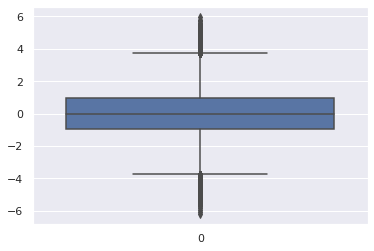

In [16]:
sns.boxplot(data = mean_differences)
plt.show()

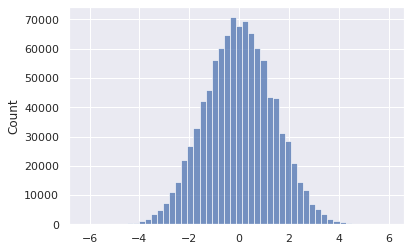

In [17]:
sns.histplot(mean_differences, bins = 50)
plt.show()

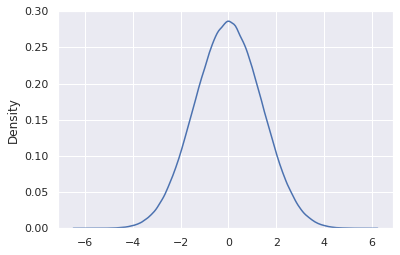

In [18]:
sns.kdeplot(mean_differences)
plt.show()

In [19]:
print('Mean:', np.mean(_mosquitos.beer_response) - np.mean(_mosquitos.water_response))
print('Geometric Mean:', gmean(_mosquitos.beer_response) - gmean(_mosquitos.water_response))
print('Harmonic Mean:', st.harmonic_mean(_mosquitos.beer_response) - st.harmonic_mean(_mosquitos.water_response))

Mean: 4.37777777777778
Geometric Mean: 4.398713175692652
Harmonic Mean: 4.459776787460434


In [20]:
np.percentile(mean_differences, 99.9)

4.099435834640155

In [21]:
total = 0
greater_than_target_mean = 0

for mean_difference in mean_differences:
    
    total += 1

    if mean_difference >= 4.4: greater_than_target_mean += 1
        
print('Number greater than targe mean: ', greater_than_target_mean)
print('Total: ', total)
print(greater_than_target_mean / total)

Number greater than targe mean:  403
Total:  1000000
0.000403


#### Computational Method - Proportional

In [22]:
mean_differences = []

for count in range(1000000):
    
    random_distribution1 = []
    random_distribution2 = []
    
    measurements = _mosquitos.file_data['Response'].to_numpy()
    measurements = np.sort(measurements)
    np.random.shuffle(measurements)
    
    measurement_count = 0

    for measurement in measurements:

        measurement_count += 1
        
        if measurement_count <= 18:
            random_distribution1.append(measurement)
        else:
            random_distribution2.append(measurement)

    distribution_mean1 = np.mean(random_distribution1)
    distribution_mean2 = np.mean(random_distribution2)

    mean_difference = distribution_mean1 - distribution_mean2
    mean_differences.append(mean_difference)
    
print(np.mean(mean_differences))        

0.00039803777777777834


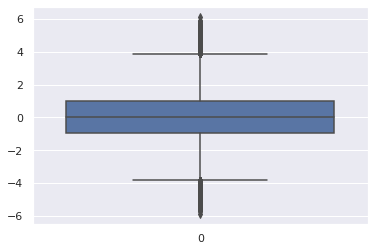

In [23]:
sns.boxplot(data = mean_differences)
plt.show()

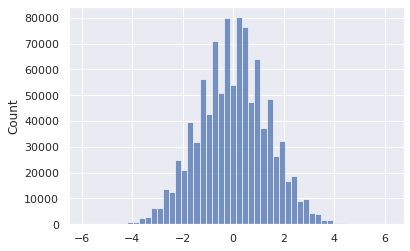

In [24]:
sns.histplot(mean_differences, bins = 50)
plt.show()

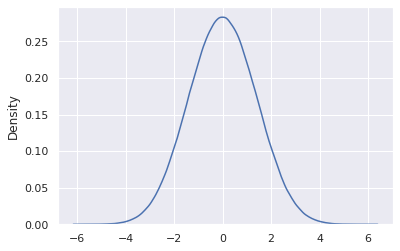

In [25]:
sns.kdeplot(mean_differences)
plt.show()

In [26]:
print('Mean:', np.mean(_mosquitos.beer_response) - np.mean(_mosquitos.water_response))
print('Geometric Mean:', gmean(_mosquitos.beer_response) - gmean(_mosquitos.water_response))
print('Harmonic Mean:', st.harmonic_mean(_mosquitos.beer_response) - st.harmonic_mean(_mosquitos.water_response))

Mean: 4.37777777777778
Geometric Mean: 4.398713175692652
Harmonic Mean: 4.459776787460434


In [27]:
np.percentile(mean_differences, 99.9)

4.126666666666669

In [28]:
total = 0
greater_than_target_mean = 0

for mean_difference in mean_differences:
    
    total += 1

    if mean_difference >= 4.4: greater_than_target_mean += 1
        
print('Number greater than targe mean: ', greater_than_target_mean)
print('Total: ', total)
print(greater_than_target_mean / total)

Number greater than targe mean:  490
Total:  1000000
0.00049


T-tests support the assertion that beer consumption will make the consumer more attractive to mosquitos.

In [29]:
stats.ttest_1samp(_mosquitos.water_response, np.mean(_mosquitos.beer_response))

Ttest_1sampResult(statistic=-5.059310687858129, pvalue=9.680794997942742e-05)

In [30]:
stats.ttest_ind(_mosquitos.water_response, _mosquitos.beer_response)

Ttest_indResult(statistic=-3.5869843832143413, pvalue=0.0008831268539665391)

### Conclusion

Consumption of beer does appear to make the consumer more attractive to mosquitos. This assertion can be made at a confidence level greater than 99%.